# Análise da diferença salarial para trabalhadores de TI conforme a união federativa (UF) de cada indivíduo.

Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres
com funções trabalhistas de TI distribuídos em qualquer setor produtivo no Brasil, 
conforme a união federativa (UF) de cada indivíduo em um recorte de 2009 e 2019.

## Etapas iniciais para realização das análises:

### Imports necessários para realização dos processamentos e análises:

In [1]:
import pandas as pd
import matplotlib.colors as mcl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Imports de mapas
import geopandas as gpd

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:

In [2]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
#escol = {5: 'Fundamental Completo', 7: 'Médio Completo', 9: 'Superior Completo', 10: 'Mestrado', 11: 'Doutorado'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

xlim_total_esquerda = -73.98318216
xlim_total_direita = -34.79331171

### Etapa de leitura dos dados das tabelas em CSV para 2009 e 2019 e mapa Brasil:

In [3]:
# Leitura da tabela de dados gerais para 2009:
RAIS_GERAL_2009 = pd.read_csv("../data/DATA_RAIS_GERAL_2009.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2009.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [4]:
# Leitura da tabela de dados gerais para 2019:
RAIS_GERAL_2019 = pd.read_csv("../data/DATA_RAIS_GERAL_2019.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2019.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [5]:
# Leitura do mapa do Brasil para utilização:
df_br_map = gpd.read_file("../data/shapefiles/lml_unidade_federacao_a.shp")

# Criação da coluna centroid, com o centro de cada polígono (Estado)
df_br_map['centroid'] = df_br_map.centroid

C:\Users\YOHANNGABRIELOLIANIF\AppData\Local\Temp\ipykernel_16656\96920001.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_br_map['centroid'] = df_br_map.centroid


In [6]:
'''UF = pd.Series.to_frame(RAIS_GERAL_2009['UF'].value_counts())
UF['qnt_total'] = UF['UF'].astype(object)
del UF['UF']
UF['sigla'] = UF.index
df_br_map = df_br_map.merge(UF, how = 'inner', on = 'sigla')

map_fig = df_br_map.plot(figsize = (16,16))
map_fig.set_axis_off()

df_br_map.apply(lambda x: map_fig.annotate(text=x['qnt_total'], xy=(x['centroid'].coords[0][0],x['centroid'].coords[0][1]), ha='center', bbox = dict(boxstyle="round,pad=.5", fc="0.9")), axis=1)
map_fig'''

'UF = pd.Series.to_frame(RAIS_GERAL_2009[\'UF\'].value_counts())\nUF[\'qnt_total\'] = UF[\'UF\'].astype(object)\ndel UF[\'UF\']\nUF[\'sigla\'] = UF.index\ndf_br_map = df_br_map.merge(UF, how = \'inner\', on = \'sigla\')\n\nmap_fig = df_br_map.plot(figsize = (16,16))\nmap_fig.set_axis_off()\n\ndf_br_map.apply(lambda x: map_fig.annotate(text=x[\'qnt_total\'], xy=(x[\'centroid\'].coords[0][0],x[\'centroid\'].coords[0][1]), ha=\'center\', bbox = dict(boxstyle="round,pad=.5", fc="0.9")), axis=1)\nmap_fig'

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [7]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2009 (data dos dados para 2009) 
# até 04/2022 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2009 = 2.14068130

RAIS_GERAL_2009["Remuneração"] = RAIS_GERAL_2009["Remuneração"] * fator_correcao_inflacao_2009

# Índice de correção de inflação para o período de 12/2019 (data dos dados para 2019) 
# até 04/2022 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2019 = 1.22858430

RAIS_GERAL_2019["Remuneração"] = RAIS_GERAL_2019["Remuneração"] * fator_correcao_inflacao_2019

### Exibição das tabelas gerais para cada ano:

In [8]:
# Exibindo os cinco primeiros dados da tabela de 2009:
RAIS_GERAL_2009.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,AC,317205,73114,2,21,02,"1,498.48",1
1,AC,317205,73114,2,29,02,"2,140.68",1
2,AC,317205,47717,2,33,02,"2,140.68",1
3,AC,212420,47512,4,29,08,"2,354.75",1
4,AC,142530,47814,6,32,08,"1,806.35",1


In [9]:
# Exibindo os cinco primeiros dados da tabela de 2009:
RAIS_GERAL_2019.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,212405,72100,1,20,8,"2,554.23",1
1,MS,212405,10996,1,37,2,"2,242.77",1
2,MS,317210,84116,2,27,8,"1,626.51",1
3,MS,212415,47440,3,35,8,"5,580.60",1
4,MS,317210,62031,3,40,9,"1,847.79",1


### Alimentando com dados a tabela do mapa do Brasil:

In [10]:
# Tabela principal para quantidade em 2009:
RAIS_GERAL_2009_QNT = pd.crosstab(RAIS_GERAL_2009["UF"], RAIS_GERAL_2009["Sexo"].replace(sexo))
RAIS_GERAL_2009_QNT.reset_index(inplace = True)
RAIS_GERAL_2009_QNT.rename(columns = {'UF':'sigla','Fem.':'qnt_mulheres_2009', 'Masc.':'qnt_homens_2009'}, inplace = True)
RAIS_GERAL_2009_QNT.insert(2, "perc_mulheres_2009", RAIS_GERAL_2009_QNT["qnt_mulheres_2009"] / (RAIS_GERAL_2009_QNT["qnt_mulheres_2009"].sum()) * 100)
RAIS_GERAL_2009_QNT.insert(4, "perc_homens_2009", RAIS_GERAL_2009_QNT["qnt_homens_2009"] / (RAIS_GERAL_2009_QNT["qnt_homens_2009"].sum()) * 100)

df_br_map = df_br_map.merge(RAIS_GERAL_2009_QNT, how = 'inner', on = 'sigla')

In [11]:
# Tabela principal para quantidade em 2019:
RAIS_GERAL_2019_QNT = pd.crosstab(RAIS_GERAL_2019["UF"], RAIS_GERAL_2019["Sexo"].replace(sexo))
RAIS_GERAL_2019_QNT.reset_index(inplace = True)
RAIS_GERAL_2019_QNT.rename(columns = {'UF':'sigla','Fem.':'qnt_mulheres_2019', 'Masc.':'qnt_homens_2019'}, inplace = True)
RAIS_GERAL_2019_QNT.insert(2, "perc_mulheres_2019", RAIS_GERAL_2019_QNT["qnt_mulheres_2019"] / (RAIS_GERAL_2019_QNT["qnt_mulheres_2019"].sum()) * 100)
RAIS_GERAL_2019_QNT.insert(4, "perc_homens_2019", RAIS_GERAL_2019_QNT["qnt_homens_2019"] / (RAIS_GERAL_2019_QNT["qnt_homens_2019"].sum()) * 100)
df_br_map = df_br_map.merge(RAIS_GERAL_2019_QNT, how = 'inner', on = 'sigla')

In [12]:
# Tabela principal para média e diferença salarial em 2009:
RAIS_GERAL_2009_MEDIA = pd.crosstab(RAIS_GERAL_2009["UF"], RAIS_GERAL_2009["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2009_MEDIA.reset_index(inplace = True)
RAIS_GERAL_2009_MEDIA.rename(columns = {'UF':'sigla','Fem.':'salario_medio_mulheres_2009', 'Masc.':'salario_medio_homens_2009'}, inplace = True)
RAIS_GERAL_2009_MEDIA.insert(3, "dif_salarial_media_2009", ((RAIS_GERAL_2009_MEDIA["salario_medio_mulheres_2009"] - RAIS_GERAL_2009_MEDIA["salario_medio_homens_2009"]) / RAIS_GERAL_2009_MEDIA["salario_medio_homens_2009"]) * 100)
df_br_map = df_br_map.merge(RAIS_GERAL_2009_MEDIA, how = 'inner', on = 'sigla')

In [13]:
# Tabela principal para média e diferença salarial em 2019:
RAIS_GERAL_2019_MEDIA = pd.crosstab(RAIS_GERAL_2019["UF"], RAIS_GERAL_2019["Sexo"].replace(sexo), values = RAIS_GERAL_2019.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2019_MEDIA.reset_index(inplace = True)
RAIS_GERAL_2019_MEDIA.rename(columns = {'UF':'sigla','Fem.':'salario_medio_mulheres_2019', 'Masc.':'salario_medio_homens_2019'}, inplace = True)
RAIS_GERAL_2019_MEDIA.insert(3, "dif_salarial_media_2019", ((RAIS_GERAL_2019_MEDIA["salario_medio_mulheres_2019"] - RAIS_GERAL_2019_MEDIA["salario_medio_homens_2019"]) / RAIS_GERAL_2019_MEDIA["salario_medio_homens_2019"]) * 100)
df_br_map = df_br_map.merge(RAIS_GERAL_2019_MEDIA, how = 'inner', on = 'sigla')

In [14]:
# Tabela principal para mediana e diferença salarial em 2009:
RAIS_GERAL_2009_MEDIANA = pd.crosstab(RAIS_GERAL_2009["UF"], RAIS_GERAL_2009["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'median')
RAIS_GERAL_2009_MEDIANA.reset_index(inplace = True)
RAIS_GERAL_2009_MEDIANA.rename(columns = {'UF':'sigla','Fem.':'salario_mediano_mulheres_2009', 'Masc.':'salario_mediano_homens_2009'}, inplace = True)
RAIS_GERAL_2009_MEDIANA.insert(3, "dif_salarial_mediano_2009", ((RAIS_GERAL_2009_MEDIANA["salario_mediano_mulheres_2009"] - RAIS_GERAL_2009_MEDIANA["salario_mediano_homens_2009"]) / RAIS_GERAL_2009_MEDIANA["salario_mediano_homens_2009"]) * 100)
df_br_map = df_br_map.merge(RAIS_GERAL_2009_MEDIANA, how = 'inner', on = 'sigla')

In [15]:
# Tabela principal para mediana e diferença salarial em 2019:
RAIS_GERAL_2019_MEDIANA = pd.crosstab(RAIS_GERAL_2019["UF"], RAIS_GERAL_2019["Sexo"].replace(sexo), values = RAIS_GERAL_2019.Remuneração, aggfunc = 'median')
RAIS_GERAL_2019_MEDIANA.reset_index(inplace = True)
RAIS_GERAL_2019_MEDIANA.rename(columns = {'UF':'sigla','Fem.':'salario_mediano_mulheres_2019', 'Masc.':'salario_mediano_homens_2019'}, inplace = True)
RAIS_GERAL_2019_MEDIANA.insert(3, "dif_salarial_mediano_2019", ((RAIS_GERAL_2019_MEDIANA["salario_mediano_mulheres_2019"] - RAIS_GERAL_2019_MEDIANA["salario_mediano_homens_2019"]) / RAIS_GERAL_2019_MEDIANA["salario_mediano_homens_2019"]) * 100)
df_br_map = df_br_map.merge(RAIS_GERAL_2019_MEDIANA, how = 'inner', on = 'sigla')

## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme a escolaridade de cada indivíduo:

### Criação das tabelas para relatório e tabela para formação do gráfico:

In [16]:
# Tabela principal para quantidade em 2019:
RAIS_GERAL_2009_PERC = pd.crosstab(RAIS_GERAL_2009["UF"], RAIS_GERAL_2009["Sexo"].replace(sexo))
RAIS_GERAL_2019_PERC = pd.crosstab(RAIS_GERAL_2019["UF"], RAIS_GERAL_2019["Sexo"].replace(sexo))

RAIS_GERAL_2009_PERC.insert(2, "% Mulheres 2009", RAIS_GERAL_2009_PERC["Fem."] / (RAIS_GERAL_2009_PERC["Fem."] + RAIS_GERAL_2009_PERC["Masc."]) * 100)
RAIS_GERAL_2009_PERC.insert(3, "% Homens 2009", RAIS_GERAL_2009_PERC["Masc."] / (RAIS_GERAL_2009_PERC["Fem."] + RAIS_GERAL_2009_PERC["Masc."]) * 100)
RAIS_GERAL_2009_PERC.insert(4, "% Mulheres 2019", RAIS_GERAL_2019_PERC["Fem."] / (RAIS_GERAL_2019_PERC["Fem."] + RAIS_GERAL_2019_PERC["Masc."]) * 100)
RAIS_GERAL_2009_PERC.insert(5, "% Homens 2019", RAIS_GERAL_2019_PERC["Masc."] / (RAIS_GERAL_2019_PERC["Fem."] + RAIS_GERAL_2019_PERC["Masc."]) * 100)

RAIS_GERAL_2009_PERC.drop('Fem.', inplace=True, axis=1)
RAIS_GERAL_2009_PERC.drop('Masc.', inplace=True, axis=1)

RAIS_GERAL_2009_PERC

Sexo,% Mulheres 2009,% Homens 2009,% Mulheres 2019,% Homens 2019
UF,,,,
AC,26.45,73.55,15.43,84.57
AL,20.23,79.77,14.63,85.37
AM,21.71,78.29,15.25,84.75
AP,26.91,73.09,24.49,75.51
BA,26.88,73.12,19.16,80.84
CE,26.36,73.64,22.94,77.06
DF,25.16,74.84,20.32,79.68
ES,20.98,79.02,20.07,79.93
GO,17.64,82.36,14.55,85.45


In [17]:
cor_mapa_qnt = mcl.LinearSegmentedColormap.from_list(name = 'Oranges', colors = ['#B1F5D7', '#150E11'], N = 256)

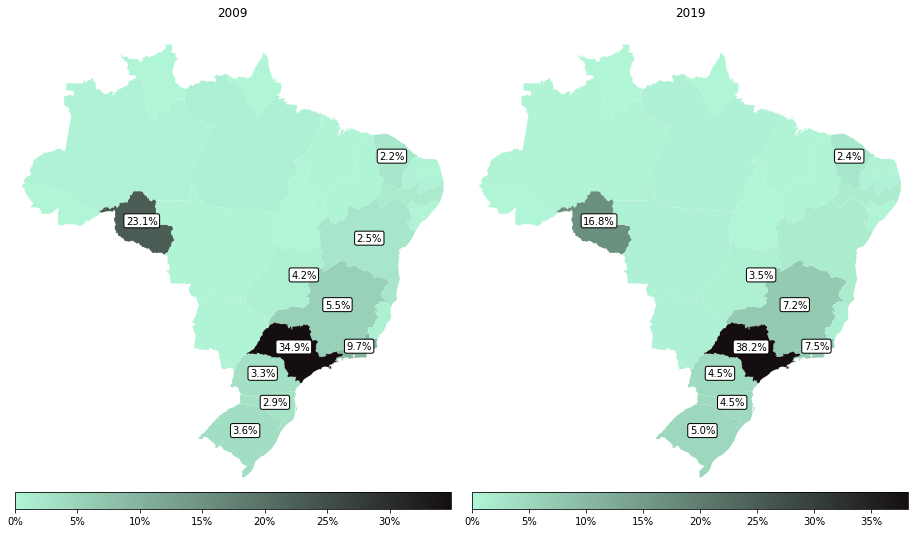

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 16))
fig.subplots_adjust(wspace = 0.05)

ax1.set_xlim(xlim_total_esquerda, xlim_total_direita)
ax2.set_xlim(xlim_total_esquerda, xlim_total_direita)

df_br_map.apply(lambda x: ax1.annotate(text = '{:.1f}%'.format(x['perc_mulheres_2009']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                       ha='center', bbox = dict(boxstyle = "round,pad = .2", fc = "1")) 
                        if x['perc_mulheres_2009'] >= 2 else '', axis = 1)

df_br_map.apply(lambda x: ax2.annotate(text = '{:.1f}%'.format(x['perc_mulheres_2019']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                       ha='center', bbox = dict(boxstyle = "round,pad = .2", fc = "1")) 
                        if x['perc_mulheres_2019'] >= 2 else '', axis = 1)

df_br_map.plot(cmap = cor_mapa_qnt, column = 'perc_mulheres_2009', ax = ax1)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("bottom", size="3.5%", pad=-0.1)
cax1.xaxis.set_ticks_position("bottom")

fig.colorbar(plt.cm.ScalarMappable(cmap = cor_mapa_qnt, 
                                   norm = plt.Normalize(vmin = 0, vmax = df_br_map['perc_mulheres_2009'].max())), 
                                   cax1, orientation = "horizontal", format = lambda x, _: f"{x:.0f}%")

df_br_map.plot(cmap = cor_mapa_qnt, column = 'perc_mulheres_2019', ax = ax2)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("bottom", size="3.5%", pad=-0.1)

cax2.xaxis.set_ticks_position("bottom")

fig.colorbar(plt.cm.ScalarMappable(cmap = cor_mapa_qnt, 
                                   norm = plt.Normalize(vmin = 0, vmax = df_br_map['perc_mulheres_2019'].max())), 
                                   cax2, orientation = "horizontal", format=lambda x, _: f"{x:.0f}%")

ax1.set_axis_off()
ax2.set_axis_off()

ax1.title.set_text('2009')
ax2.title.set_text('2019')

fig.savefig("./figures/png/map_qnt_mulheres.png", dpi = 300)

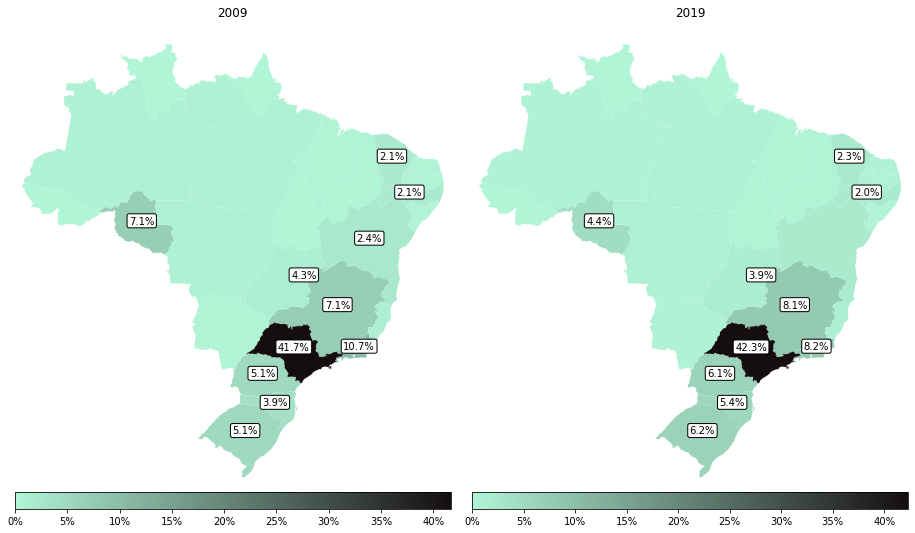

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 16))
fig.subplots_adjust(wspace = 0.05)

ax1.set_xlim(xlim_total_esquerda, xlim_total_direita)
ax2.set_xlim(xlim_total_esquerda, xlim_total_direita)

df_br_map.apply(lambda x: ax1.annotate(text = '{:.1f}%'.format(x['perc_homens_2009']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                       ha='center', bbox = dict(boxstyle = "round,pad = .2", fc = "1")) 
                        if x['perc_homens_2009'] >= 2 else '', axis = 1)

df_br_map.apply(lambda x: ax2.annotate(text = '{:.1f}%'.format(x['perc_homens_2019']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                       ha='center', bbox = dict(boxstyle = "round,pad = .2", fc = "1")) 
                        if x['perc_homens_2019'] >= 2 else '', axis = 1)

df_br_map.plot(cmap = cor_mapa_qnt, column = 'perc_homens_2009', ax = ax1)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("bottom", size="3.5%", pad=-0.1)
cax1.xaxis.set_ticks_position("bottom")

fig.colorbar(plt.cm.ScalarMappable(cmap = cor_mapa_qnt, 
                                   norm = plt.Normalize(vmin = 0, vmax = df_br_map['perc_homens_2009'].max())), 
                                   cax1, orientation = "horizontal", format = lambda x, _: f"{x:.0f}%")

df_br_map.plot(cmap = cor_mapa_qnt, column = 'perc_homens_2019', ax = ax2)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("bottom", size="3.5%", pad=-0.1)

cax2.xaxis.set_ticks_position("bottom")

fig.colorbar(plt.cm.ScalarMappable(cmap = cor_mapa_qnt, 
                                   norm = plt.Normalize(vmin = 0, vmax = df_br_map['perc_homens_2019'].max())), 
                                   cax2, orientation = "horizontal", format=lambda x, _: f"{x:.0f}%")

ax1.set_axis_off()
ax2.set_axis_off()

ax1.title.set_text('2009')
ax2.title.set_text('2019')

fig.savefig("./figures/png/map_qnt_homens.png", dpi = 300)

## Análise das médias salariais e diferenças:

### Teste de hipótese para cada grupo de médias por CBOs:

In [20]:
# Tabela principal para mediana e diferença salarial em 2009:
RAIS_GERAL_2009_MEDIANA = pd.crosstab(RAIS_GERAL_2009["UF"], RAIS_GERAL_2009["Sexo"].replace(sexo), values = RAIS_GERAL_2009.Remuneração, aggfunc = 'median')
RAIS_GERAL_2009_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2009_MEDIANA["Fem."] - RAIS_GERAL_2009_MEDIANA["Masc."]) / RAIS_GERAL_2009_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2009_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
UF,,,
AC,"4,888.78","4,140.31",18.08
AL,"1,455.66","2,568.82",-43.33
AM,"5,088.68","5,216.03",-2.44
AP,"3,638.07","2,951.38",23.27
BA,"2,742.47","3,008.86",-8.85


In [21]:
# Tabela principal para média e diferença salarial em 2019:
RAIS_GERAL_2019_MEDIANA = pd.crosstab(RAIS_GERAL_2019["UF"], RAIS_GERAL_2019["Sexo"].replace(sexo), values = RAIS_GERAL_2019.Remuneração, aggfunc = 'median')
RAIS_GERAL_2019_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2019_MEDIANA["Fem."] - RAIS_GERAL_2019_MEDIANA["Masc."]) / RAIS_GERAL_2019_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2019_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
UF,,,
AC,"3,213.92","3,543.85",-9.31
AL,"2,827.66","2,853.39",-0.90
AM,"4,705.20","5,238.89",-10.19
AP,"3,162.68","2,500.51",26.48
BA,"3,655.93","3,322.66",10.03


In [22]:
RAIS_GERAL_2009_MEDIANA.insert(3, "Ano", "2009")

RAIS_GERAL_2019_MEDIANA.insert(3, "Ano", "2019")

In [23]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes', ''
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais', '*'

In [24]:
TESTE_HIP_2009 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.', 'sigla', 'result_estat'])

list_uf = RAIS_GERAL_2009['UF'].value_counts().index.to_list()

for uf in list_uf:
    df1 = RAIS_GERAL_2009.query("Sexo == 1").query("UF == '{}'".format(uf)).Remuneração
    df2 = RAIS_GERAL_2009.query("Sexo == 2").query("UF == '{}'".format(uf)).Remuneração

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result, result_estat = teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result, result_estat = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2009.loc[uf] = [str(stat), '0.01 > {:.5f}...'.format(p), result, uf, result_estat]

RAIS_GERAL_2009_HIP = pd.merge(RAIS_GERAL_2009_MEDIANA, TESTE_HIP_2009, left_index=True, right_index=True)
RAIS_GERAL_2009_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2009_HIP.head(30)

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.,sigla,result_estat
AC,"4,888.78","4,140.31",5226.0,0.01 > 0.16414...,Medianas estatisticamente iguais,AC,*
AL,"1,455.66","2,568.82",81042.0,0.01 > 0.00000...,Medianas estatisticamente diferentes,AL,
AM,"5,088.68","5,216.03",610336.5,0.01 > 0.04999...,Medianas estatisticamente iguais,AM,*
AP,"3,638.07","2,951.38",14751.5,0.01 > 0.09326...,Medianas estatisticamente iguais,AP,*
BA,"2,742.47","3,008.86",8642204.5,0.01 > 0.00686...,Medianas estatisticamente diferentes,BA,
CE,"1,681.95","2,747.18",5431953.5,0.01 > 0.00000...,Medianas estatisticamente diferentes,CE,
DF,"10,929.87","10,219.63",26083317.0,0.01 > 0.00042...,Medianas estatisticamente diferentes,DF,
ES,"4,647.99","4,245.46",1863092.0,0.01 > 0.23778...,Medianas estatisticamente iguais,ES,*
GO,"3,787.14","3,425.09",1857400.5,0.01 > 0.01566...,Medianas estatisticamente iguais,GO,*
MA,"3,639.16","2,568.82",225948.5,0.01 > 0.00004...,Medianas estatisticamente diferentes,MA,


In [25]:
# Tabela principal para teste estatistico 2009:
RAIS_GERAL_2009_HIP.reset_index(inplace = True)
RAIS_GERAL_2009_HIP.drop('Fem.', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.drop('Masc.', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.drop('Estat. Mann-Whitney', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.drop('pValor', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.drop('Resultado Estat.', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.drop('index', inplace=True, axis=1)
RAIS_GERAL_2009_HIP.rename(columns = {'result_estat':'result_estat_2009'}, inplace = True)
df_br_map = df_br_map.merge(RAIS_GERAL_2009_HIP, how = 'inner', on = 'sigla')

In [26]:
TESTE_HIP_2019 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.', 'sigla', 'result_estat'])

for uf in list_uf:
    df1 = RAIS_GERAL_2019.query("Sexo == 1").query("UF == '{}'".format(uf)).Remuneração
    df2 = RAIS_GERAL_2019.query("Sexo == 2").query("UF == '{}'".format(uf)).Remuneração
    
    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result, result_estat = teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result, result_estat = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2019.loc[uf] = [str(stat), '0.01 > {:.5f}...'.format(p), result, uf, result_estat]

RAIS_GERAL_2019_HIP = pd.merge(RAIS_GERAL_2019_MEDIANA, TESTE_HIP_2019, left_index=True, right_index=True)
RAIS_GERAL_2019_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2019_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2019_HIP.head(30)

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.,sigla,result_estat
AC,"3,213.92","3,543.85",6626.0,0.01 > 0.35683...,Medianas estatisticamente iguais,AC,*
AL,"2,827.66","2,853.39",267312.0,0.01 > 0.92753...,Medianas estatisticamente iguais,AL,*
AM,"4,705.20","5,238.89",821035.5,0.01 > 0.02807...,Medianas estatisticamente iguais,AM,*
AP,"3,162.68","2,500.51",19077.0,0.01 > 0.01909...,Medianas estatisticamente iguais,AP,*
BA,"3,655.93","3,322.66",9191194.0,0.01 > 0.00021...,Medianas estatisticamente diferentes,BA,
CE,"2,653.63","3,390.66",14365250.5,0.01 > 0.00000...,Medianas estatisticamente diferentes,CE,
DF,"9,470.41","9,381.20",39352091.0,0.01 > 0.06756...,Medianas estatisticamente iguais,DF,*
ES,"3,752.10","4,309.36",4172782.0,0.01 > 0.00000...,Medianas estatisticamente diferentes,ES,
GO,"3,440.04","3,943.25",4266378.0,0.01 > 0.00000...,Medianas estatisticamente diferentes,GO,
MA,"2,087.12","2,609.02",419230.0,0.01 > 0.03464...,Medianas estatisticamente iguais,MA,*


In [27]:
# Tabela principal para teste estatistico 2019:
RAIS_GERAL_2019_HIP.reset_index(inplace = True)
RAIS_GERAL_2019_HIP.drop('Fem.', inplace=True, axis=1)
RAIS_GERAL_2019_HIP.drop('Masc.', inplace=True, axis=1)
RAIS_GERAL_2019_HIP.drop('Estat. Mann-Whitney', inplace=True, axis=1)
RAIS_GERAL_2019_HIP.drop('pValor', inplace=True, axis=1)
RAIS_GERAL_2019_HIP.drop('Resultado Estat.', inplace=True, axis=1)
RAIS_GERAL_2019_HIP.drop('index', inplace=True, axis=1)
RAIS_GERAL_2019_HIP.rename(columns = {'result_estat':'result_estat_2019'}, inplace = True)
df_br_map = df_br_map.merge(RAIS_GERAL_2019_HIP, how = 'inner', on = 'sigla')

### Criação dos mapas com as diferenças salariais medianas para cada ano:

In [28]:
cor_mapa_dif_2009 = mcl.LinearSegmentedColormap.from_list(name = 'Oranges2', colors = ['#B1F5D7', '#8ABFA8', '#658C7B','#150E11'], N = 256)

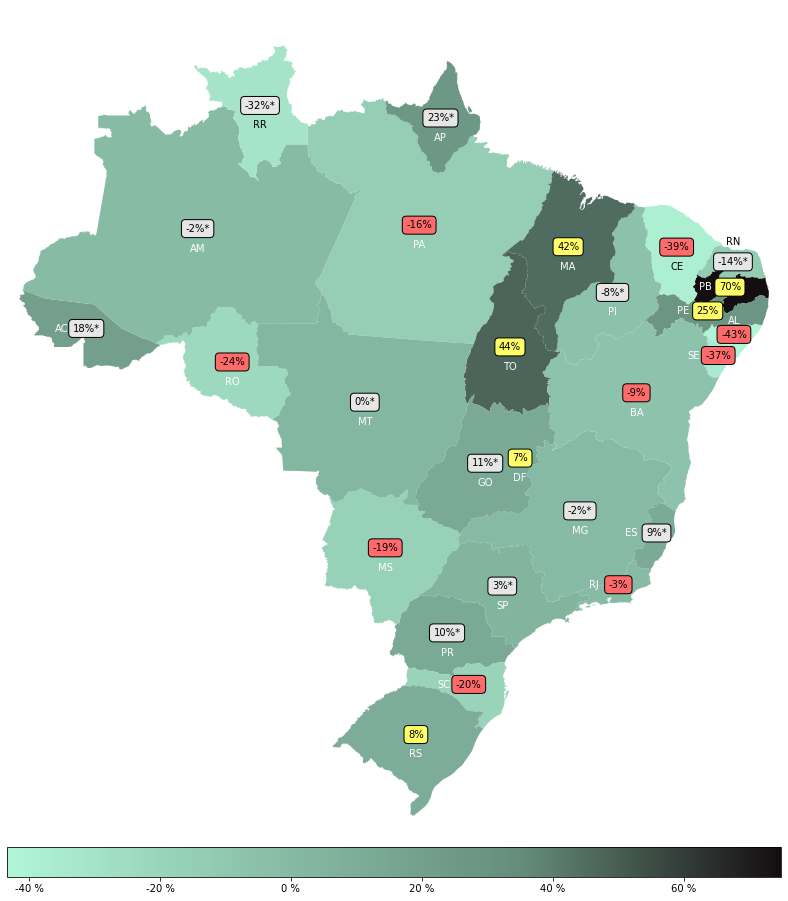

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (20, 16))

ax.set_xlim(xlim_total_esquerda, xlim_total_direita)

df_br_map.apply(lambda x: ax.annotate(text = '{:.0f}%{}'.format(x['dif_salarial_mediano_2009'], x['result_estat_2009']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                       ha='center', bbox = dict(boxstyle = "round,pad = .4", fc="0.9"))
                        if x['result_estat_2009'] == '*' else
                                ax.annotate(text = '{:.0f}%{}'.format(x['dif_salarial_mediano_2009'], x['result_estat_2009']), 
                                            xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                            ha='center', bbox = dict(facecolor = '#FFFE66', boxstyle = "round,pad = .4"))
                        if x['dif_salarial_mediano_2009'] >= 0 else 
                                ax.annotate(text = '{:.0f}%{}'.format(x['dif_salarial_mediano_2009'], x['result_estat_2009']), 
                                            xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                            ha='center', bbox = dict(facecolor = '#FF6B6B', boxstyle = "round,pad = .4"))
                , axis = 1)


df_br_map.plot(cmap = cor_mapa_dif_2009, column = 'dif_salarial_mediano_2009', ax = ax)

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3.5%", pad=-0.1)
cax.xaxis.set_ticks_position("bottom")

fig.colorbar(plt.cm.ScalarMappable(cmap = cor_mapa_dif_2009, 
                                   norm = plt.Normalize(vmin = df_br_map['dif_salarial_mediano_2009'].min(), vmax = df_br_map['dif_salarial_mediano_2009'].max()+5)), 
                                   cax, orientation = "horizontal", format = lambda x, _: f"{x:.0f} %")

ax.set_axis_off()

df_br_map.apply(lambda x: ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0]-1.3, x['centroid'].coords[0][1]), 
                                       ha='center', color = 'white')
                        if ((x['sigla'] == 'AC') | (x['sigla'] == 'RJ') | (x['sigla'] == 'ES') | (x['sigla'] == 'SE') |
                            (x['sigla'] == 'PE') | (x['sigla'] == 'PB') | (x['sigla'] == 'SC')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]+.7), 
                                       ha='center', color = 'white')
                        if (x['sigla'] == 'AL') else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]+1), 
                                       ha='center', color = 'black')
                        if ((x['sigla'] == 'RN')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]-1), 
                                       ha='center', color = 'black')
                        if ((x['sigla'] == 'RR') | (x['sigla'] == 'CE')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]-1), 
                                       ha='center', color = 'white')
                                       , axis = 1)

fig.savefig("./figures/png/map_dif_mediana_2009.png", dpi = 300)

In [30]:
cor_mapa_dif_2019 = mcl.LinearSegmentedColormap.from_list(name = 'Oranges2', colors = ['#B1F5D7', '#A5E6CA', '#150E11'], N = 256)

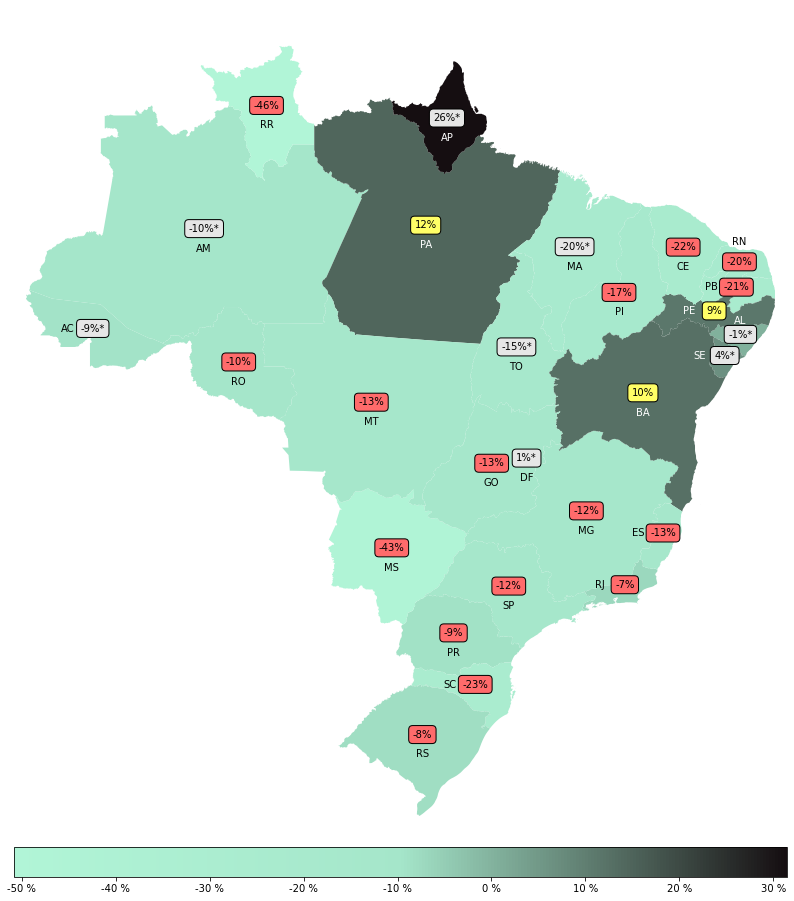

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (20, 16))

ax.set_xlim(xlim_total_esquerda, xlim_total_direita)

df_br_map.apply(lambda x: ax.annotate(text = '{:.0f}%{}'.format(x['dif_salarial_mediano_2019'], x['result_estat_2019']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                       ha='center', bbox = dict(boxstyle = "round,pad = .4", fc="0.9"))
                        if x['result_estat_2019'] == '*' else
                                ax.annotate(text = '{:.0f}%{}'.format(x['dif_salarial_mediano_2019'], x['result_estat_2019']), 
                                            xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                            ha='center', bbox = dict(facecolor = '#FFFE66', boxstyle = "round,pad = .4"))
                        if x['dif_salarial_mediano_2019'] >= 0 else 
                                ax.annotate(text = '{:.0f}%{}'.format(x['dif_salarial_mediano_2019'], x['result_estat_2019']), 
                                            xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                            ha='center', bbox = dict(facecolor = '#FF6B6B', boxstyle = "round,pad = .4"))
                , axis = 1)

df_br_map.plot(cmap = cor_mapa_dif_2019, column = 'dif_salarial_mediano_2019', ax = ax)

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3.5%", pad=-0.1)
cax.xaxis.set_ticks_position("bottom")

fig.colorbar(plt.cm.ScalarMappable(cmap = cor_mapa_dif_2019, 
                                   norm = plt.Normalize(vmin = df_br_map['dif_salarial_mediano_2019'].min()-5, vmax = df_br_map['dif_salarial_mediano_2019'].max()+5)), 
                                   cax, orientation = "horizontal", format = lambda x, _: f"{x:.0f} %")

ax.set_axis_off()

df_br_map.apply(lambda x: ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0]-1.3, x['centroid'].coords[0][1]), 
                                       ha='center', color = 'white')
                        if ((x['sigla'] == 'SE') | (x['sigla'] == 'PE')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0]-1.3, x['centroid'].coords[0][1]), 
                                       ha='center', color = 'black')
                        if ((x['sigla'] == 'AC') | (x['sigla'] == 'RJ') | (x['sigla'] == 'ES') |
                            (x['sigla'] == 'PB') | (x['sigla'] == 'SC')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]+.7), 
                                       ha='center', color = 'white')
                        if (x['sigla'] == 'AL') else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]+1), 
                                       ha='center', color = 'black')
                        if ((x['sigla'] == 'RN')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]-1), 
                                       ha='center', color = 'black')
                        if ((x['sigla'] == 'RR') | (x['sigla'] == 'MS')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]-1), 
                                       ha='center', color = 'white')
                        if ((x['sigla'] == 'PA') | (x['sigla'] == 'BA') | (x['sigla'] == 'AP')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]-1), 
                                       ha='center', color = 'black')
                                       , axis = 1)

fig.savefig("./figures/png/map_dif_mediana_2019.png", dpi = 300)